# ANALYSIS OF BOOKS USING NLP

<img src="digital book.jpg">

## TABLE OF CONTENTS

### 1. Data extraction
### 2. Sumary Statistics
### 3. Data Cleansing
### 4. Exploratory Data Analysis
### 5. Executive summary
</br>
</br>
</br>
</br>

### 1. Data Extraction

In this analysis, we have a dataset consisting of text files. The text files contains Ebooks by Project Gutenberg. The text files containing the books are serialized from 10001 to 12386.
I will go ahead to extract the following features from each book in the dataset provided:
<ul>
    <li>Book ID</li>
    <li>Title</li>
    <li>Author</li>
    <li>Language</li>
    <li>Release date</li>
    <li>Content</li>
    <li>Length of Book(the number of words in the book)</li>
</ul>

This information when extracted will be added to a pandas dataframe with the same heading as in the list of features above.


Next, we will import the libraries that will be use for this analysis:
<ul>
    <li><b>Numpy</b> - Offers comprehensive mathematical functions, random number generators, linear algebra routines, Fourier
        transforms, array manupulation and more. Interoperable</li>
    <li><b>Pandas</b> - A data analysis and manipulation tool</li>
    <li><b>re</b> - provides a set of powerful regular expression facilities, which allows you to quickly check whether a given 
        string matches a given pattern </li>
    <li><b>nltk</b> - Natural Language Toolkit(NLTK) is a leading platform for building Python programs to work with human 
        language data</li>
    <li><b>Matplotlib</b> - Matplotlib is a comprehensive library for creating static, animated, and interactive visualizations in Python</li>
    <li><b>Seaborn</b> - Seaborn is a Python data visualization library based on matplotlib. It provides a high-level interface for drawing attractive and informative statistical graphics.</li>
</ul>

In [12]:
import numpy as np
import urllib.request
import pandas as pd
import re
import nltk
from nltk.corpus import stopwords
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from nltk.tokenize import TreebankWordTokenizer
import zipfile

Next we define a function that will read the data from the files. I will call the function 'reader'.

In [2]:
#def reader(filename):
    # Open the file in read-only mode
#    with open(filename, 'r') as file:
        # Return the contents of the file into a string variable
#        string = file.read()
#    return string

In [15]:
def reader(filename):
    # Open the zip file
    with zipfile.ZipFile('book_dataset.zip', 'r') as zip_ref:
        # Extract the .txt file to a variable
        file_name = zip_ref.namelist()[0]
        txt_file = zip_ref.read(filename)
        # Print the contents of the .txt file
    return (txt_file.decode())

Next, i will populate the dataframe columns by reading each file in the dataset, extracting the required information and then updating the table. The text files in the dataset provided are serial from 10001 to 12386. However, i noticed that some of the text files are missing; hence, i will write our code in such a way that it will skip those missing text files.

In [14]:
#Create an empty dataframe with columns ['Book_ID', 'Title', 'Author', 'Language', 'Release Date', 'Content', 'Length_of_book']
df = pd.DataFrame(columns=['Book_ID', 'Title', 'Author', 'Language', 'Release Date', 'Content', 'Length_of_book'])

#loop through the text files and extract the data needed for the analysis
for i in range(10001,12387):
    filename = str(i)+'.txt'
    try:
        #read file into variable "my_string"
        my_string = reader(filename)
        
        # Use a regular expression to extract the date
        date_regex = r"Release Date: ([A-Za-z]+ \d{1,2}, \d{4})"
        date = re.search(date_regex, my_string).group(1)
        date = date.strip()
        
        #Use a regular expression to extract the name of the author
        name_regex = r"Author: (.*)\n"
        name = re.search(name_regex, my_string).group(1)
        name = name.strip()
        
        #Use regular expression to extract the language of text
        lang_regex = r"Language:(.*)\n"
        language = re.search(lang_regex, my_string).group(1)
        language = language.strip()
        
        #Use regular expression to extract the language of text
        title_regex = r"Title:(.*)\n"
        title = re.search(title_regex, my_string).group(1)
        title = title.strip()
        
        #use regular expression to extract the content of text
        content_regex = r"\*\*\* START OF THIS PROJECT GUTENBERG EBOOK(.+?)End of the Project Gutenberg EBook"
        content = re.search(content_regex, my_string, re.DOTALL).group(1)
        content = content.strip()
        
        #Calculate the length of the content of the book
        length = len(content.split())
        
        #create a dictionary of the data extracted to append to the dataframe - df
        df1 = pd.DataFrame([{'Book_ID':i, 'Title':title, 'Author':name, 'Language':language, 'Release Date':date,\
                   'Content':content, 'Length_of_book':length}])
        #append data to df
        df = pd.concat([df, df1], axis=0, ignore_index=True)
    except:
        continue
df.head()

,Book_ID,Title,Author,Language,Release Date,Content,Length_of_book
0,10001,Apocolocyntosis,Lucius Seneca,English,"November 10, 2003",APOCOLOCYNTOSIS ***\r\n\r\n\r\n\r\n\r\nProduce...,5563
1,10002,The House on the Borderland,William Hope Hodgson,English,"November 10, 2003",THE HOUSE ON THE BORDERLAND ***\r\n\r\n\r\n\r\...,50943
2,10003,"My First Years As A Frenchwoman, 1876-1879",Mary King Waddington,English,"November 10, 2003",FIRST YEARS AS A FRENCHWOMAN ***\r\n\r\n\r\n\r...,61313
3,10005,A Voyage to the Moon,George Tucker,English,"November 7, 2003",A VOYAGE TO THE MOON ***\r\n\r\n\r\n\r\n\r\nPr...,70397
4,10006,La Fiammetta,Giovanni Boccaccio,English,"November 7, 2003",LA FIAMMETTA ***\r\n\r\n\r\n\r\n\r\nProduced b...,13270


### 2.0 Summary Statistics

In this section, we will summarize the data we were able to extract from the text files. We will verify that the datatype for the features are correct, check if we have missing data, the total number of data etc.</br> Armed with the output from this section, we can comfortably proceed to clean up the data and do EDA. Without further ado, let's proceed.

Using the "shape" method, we can deduce that our collected data has 626 records and 7 features(columns) as below.

In [4]:
df.shape

(626, 7)

Probing further, we can see that:
<ol>
    <li>There are 626 books in the dataset. Recall that the first text file in the dataset has a serial number of 10001 and the last has a serial number of 12386 hence we were expecting 2385 records. Therefore, 1759 text files are either missing from the dataset, are blank or simply not in the format required for the data extraction to happen.</li>
     <li>Out of the 626 books, only 562 are unique; hence, 64 books presumably had more than one copy in the dataset. However, the length column as well as the release date colum doesn't colaborate this because only 2 books have the same number of words. Hence, the repetetions are simply different volumes of the same book</li>
    <li>381 authorswrote the 626 books</li>
    <li>We have one unique language hence all the texts are in English</li>
</ol>

In [5]:
df.describe()

,Book_ID,Title,Author,Language,Release Date,Content,Length_of_book
count,626,626,626,626,626,626,626
unique,626,562,381,1,114,626,625
top,10001,"The Mirror of Literature, Amusement, and Instr...",Various,English,"January 22, 2004",APOCOLOCYNTOSIS ***\n\n\n\n\nProduced by Ted G...,4080
freq,1,39,111,626,20,1,2


Lets check if there is any NULL values in our data as well as the datatypes.

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 626 entries, 0 to 625
Data columns (total 7 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   Book_ID         626 non-null    object
 1   Title           626 non-null    object
 2   Author          626 non-null    object
 3   Language        626 non-null    object
 4   Release Date    626 non-null    object
 5   Content         626 non-null    object
 6   Length_of_book  626 non-null    object
dtypes: object(7)
memory usage: 34.4+ KB


It can be seen that there are no null data but the datatypes are not all correct.The "Book_ID" and "length_of_book" supposed to be integers. While the "Release date" supposed to be a date-time type. Let's change that immediatly.

In [7]:
# Convert the 'Release Date' column to datetime objects
df['Release Date'] = pd.to_datetime(df['Release Date'])
# Convert the 'Book_ID' and 'Length_of_book' columns to integers
for col in ['Book_ID', 'Length_of_book']:
    df[col] = pd.to_numeric(df[col])
# Print the dataframe info
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 626 entries, 0 to 625
Data columns (total 7 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   Book_ID         626 non-null    int64         
 1   Title           626 non-null    object        
 2   Author          626 non-null    object        
 3   Language        626 non-null    object        
 4   Release Date    626 non-null    datetime64[ns]
 5   Content         626 non-null    object        
 6   Length_of_book  626 non-null    int64         
dtypes: datetime64[ns](1), int64(2), object(4)
memory usage: 34.4+ KB


Correct!!! <span style="font-size:20px">&#128540;</span>

### 3.0 Data Cleansing

In this session, we'll clean the data by doing the following:
<ul>
    <li>We will clean the text data in the "Content" column. This involves removing noise, removing punctuations and tokenizing the texts</li>
    <li>We'll also investigate and remove the books with the same word count if it is confirmed that they are the same</li>
</ul>

Let's get cranking...

#### Removing Noise

In text analytics, removing noise (i.e. unneccesary information) is a key part of getting the data into a usable format. Some techniques are standard, but for our dataset, we'll do the following:

* removing the web-urls
* making everything lower case
* removing punctuation

In [8]:
#removing web-urls
pattern_url = r'http[s]?://(?:[A-Za-z]|[0-9]|[$-_@.&+]|[!*\(\),]|(?:%[0-9A-Fa-f][0-9A-Fa-f]))+'
subs_url = r''
df['Content'] = df['Content'].replace(to_replace = pattern_url, value = subs_url, regex = True)

#remove new line escape character
pattern_url = r"\n"
df['Content'] = df['Content'].replace(to_replace = pattern_url, value = "", regex = True)

df.head()

,Book_ID,Title,Author,Language,Release Date,Content,Length_of_book
0,10001,Apocolocyntosis,Lucius Seneca,English,2003-11-10,"APOCOLOCYNTOSIS ***Produced by Ted Garvin, Ben...",5563
1,10002,The House on the Borderland,William Hope Hodgson,English,2003-11-10,THE HOUSE ON THE BORDERLAND ***Produced by Suz...,50943
2,10003,"My First Years As A Frenchwoman, 1876-1879",Mary King Waddington,English,2003-11-10,FIRST YEARS AS A FRENCHWOMAN ***This file was ...,61313
3,10005,A Voyage to the Moon,George Tucker,English,2003-11-07,A VOYAGE TO THE MOON ***Produced by Christine ...,70397
4,10006,La Fiammetta,Giovanni Boccaccio,English,2003-11-07,"LA FIAMMETTA ***Produced by Ted Garvin, Dave M...",13270


#### Remove punctuation

First we make all the text lower case to remove some noise from capitalisation.

In [9]:
df['Content'] = df['Content'].str.lower()
df.head(1)

,Book_ID,Title,Author,Language,Release Date,Content,Length_of_book
0,10001,Apocolocyntosis,Lucius Seneca,English,2003-11-10,"apocolocyntosis ***produced by ted garvin, ben...",5563


Now let's remove the punctuation using the string import.

In [10]:
import string
print(string.punctuation)

!"#$%&'()*+,-./:;<=>?@[\]^_`{|}~


In [11]:
def remove_punctuation(text):
    return ''.join([l for l in text if l not in string.punctuation])

df['Content'] = df['Content'].apply(remove_punctuation)
df.head(2)

,Book_ID,Title,Author,Language,Release Date,Content,Length_of_book
0,10001,Apocolocyntosis,Lucius Seneca,English,2003-11-10,apocolocyntosis produced by ted garvin ben cou...,5563
1,10002,The House on the Borderland,William Hope Hodgson,English,2003-11-10,the house on the borderland produced by suzann...,50943


#### Tokenization
A tokeniser divides text into a sequence of tokens, which roughly correspond to "words". We will use tokenisers to clean up the data, making it ready for analysis

In [12]:
tokeniser = TreebankWordTokenizer()
df['Content'] = df['Content'].apply(tokeniser.tokenize)
df.head()

,Book_ID,Title,Author,Language,Release Date,Content,Length_of_book
0,10001,Apocolocyntosis,Lucius Seneca,English,2003-11-10,"[apocolocyntosis, produced, by, ted, garvin, b...",5563
1,10002,The House on the Borderland,William Hope Hodgson,English,2003-11-10,"[the, house, on, the, borderland, produced, by...",50943
2,10003,"My First Years As A Frenchwoman, 1876-1879",Mary King Waddington,English,2003-11-10,"[first, years, as, a, frenchwoman, this, file,...",61313
3,10005,A Voyage to the Moon,George Tucker,English,2003-11-07,"[a, voyage, to, the, moon, produced, by, chris...",70397
4,10006,La Fiammetta,Giovanni Boccaccio,English,2003-11-07,"[la, fiammetta, produced, by, ted, garvin, dav...",13270


The content column has been tokenized appropriately. let's now recalculate the length of book based on the tokenized content to get a more accurate number of words in each book

In [13]:
df['Length_of_book'] = df['Content'].apply(lambda x: len(x))
df.head()

,Book_ID,Title,Author,Language,Release Date,Content,Length_of_book
0,10001,Apocolocyntosis,Lucius Seneca,English,2003-11-10,"[apocolocyntosis, produced, by, ted, garvin, b...",5216
1,10002,The House on the Borderland,William Hope Hodgson,English,2003-11-10,"[the, house, on, the, borderland, produced, by...",46580
2,10003,"My First Years As A Frenchwoman, 1876-1879",Mary King Waddington,English,2003-11-10,"[first, years, as, a, frenchwoman, this, file,...",56127
3,10005,A Voyage to the Moon,George Tucker,English,2003-11-07,"[a, voyage, to, the, moon, produced, by, chris...",64919
4,10006,La Fiammetta,Giovanni Boccaccio,English,2003-11-07,"[la, fiammetta, produced, by, ted, garvin, dav...",12194


Finally we check for the books that have same word count to confirm if they are duplicates

In [14]:
# Count the frequency of each value in the 'filter' column
filter_counts = df['Length_of_book'].value_counts()

# Select the values with a frequency greater than 1
frequent_values = filter_counts[filter_counts > 1].index

# Use boolean indexing to select the rows with a 'filter' value that is in the frequent_values list
filtered_df = df[df['Length_of_book'].isin(frequent_values)]
filtered_df

,Book_ID,Title,Author,Language,Release Date,Content,Length_of_book
98,10332,"The Mirror of Literature, Amusement, and Instr...",Various,English,2003-11-29,"[the, mirror, of, literature, produced, by, jo...",11380
573,11442,"The Mirror of Literature, Amusement, and Instr...",Various,English,2004-03-04,"[mirror, of, literature, no, 405, produced, by...",11380


We immediatly noticed that the Release Dates for both books are different; hence, they can't be duplicates. On further inspection using the Book_ID, we found out that they are actually the same book title but different volumes. The word count being the same is just a wierd outlier.
</br>10332 ----> Title: The Mirror of Literature, Amusement, and Instruction Volume XII. F, No. 325, August 2, 1828.
</br>11442 ----> Title: The Mirror of Literature, Amusement, and Instruction Vol. 14, Issue 405, December 19, 1829

### 4. Exploratory Data Analysis

In this session, we will explore the relationships between  the various data features and draw insights from those relationships.
<ul>
    <li>Authors that published the highest number of books</li>
    <li>Number of books vs the frequency</li>
    <li>Authors and books with the highest word count</li>
    <li>Number of books published over time</li>
</ul>

First of all, let's look at the distribution of the number of books written by an author and also the distribution of the word counts in a book.

array([[<AxesSubplot:title={'center':'Author'}>,
        <AxesSubplot:title={'center':'Length_of_book'}>]], dtype=object)

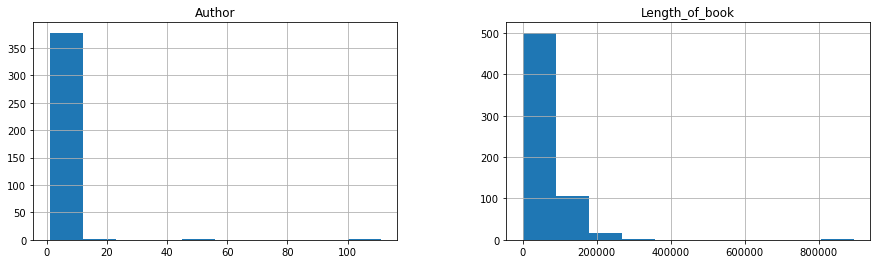

In [15]:
author_counts = df['Author'].value_counts()
len_book = df['Length_of_book']
combined_series = pd.concat([author_counts,len_book], axis=1)
features=['Author','Length_of_book']
combined_series[features].hist(figsize=(15,4))

As can be seen, the distribution for the Number of book written per author is just like a single bar standing on "1-10'. This shows that almost all the authors wrote 1-10 book. However, if we zoom into the data, there are a very scanty group of authors that wrote more than 20, 40 and 100 books respectively.
</br>
For the distribution of word count per book, majority of the books has between 1 and 200,000 words. However, there are a tiny amount of books that has more than 800,000 words. </br>These extreme observations has all the tenets of an outlier and needs to be investigated further.

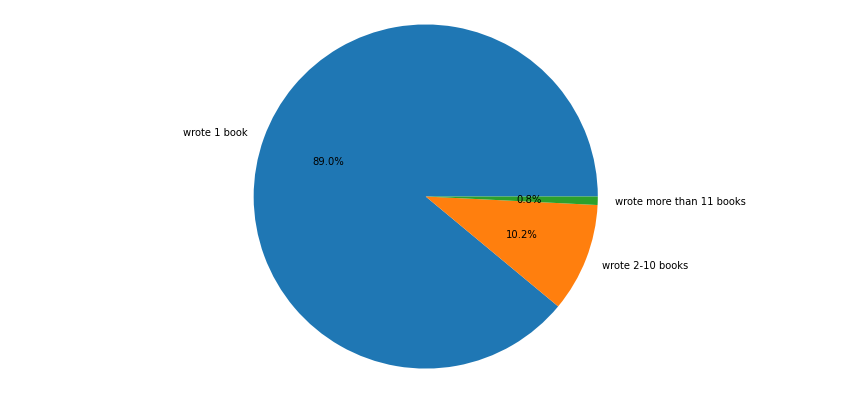

In [16]:
author_1 = combined_series[combined_series['Author'] == 1]['Author'].count()
author_2_10 = combined_series[(combined_series['Author'] > 1) & (combined_series['Author'] <= 10)]['Author'].count()
author_11_20 = combined_series[(combined_series['Author'] > 10) & (combined_series['Author'] <= 115)]['Author'].count()
sizes = [author_1, author_2_10, author_11_20]
labels = ["wrote 1 book", "wrote 2-10 books", "wrote more than 11 books"]
# Plot the pie chart
# Create a new figure with a larger plot area
plt.figure(figsize=(15, 7))
plt.pie(sizes, labels=labels, autopct='%1.1f%%')
plt.axis('equal')
plt.show()

From the chart above, it can be seen that 89% of authors (339 authors) out of the 381 authors wrote one(1) book, 10.2% of the authors (39 authors) wrote between 2 and 10 books and just 3 authors wrote more than 11 books. 
</br>
On the flip side, the most worded book is "The Anti-Slavely Examiner, Ominibus" written by the American Anti-Slavery Society. this is one out of the 5 books they wrote.

In [17]:
df.sort_values(by='Length_of_book', ascending=False, inplace=True)
df[df['Author'] == 'American Anti-Slavery Society']

,Book_ID,Title,Author,Language,Release Date,Content,Length_of_book
499,11275,"The Anti-Slavery Examiner, Omnibus",American Anti-Slavery Society,English,2004-02-25,"[the, antislavery, examiner, omnibus, produced...",894382
497,11273,"The Anti-Slavery Examiner, Part 3 of 4",American Anti-Slavery Society,English,2004-02-25,"[antislavery, examiner, part, 3, of, 4, produc...",321735
496,11272,"The Anti-Slavery Examiner, Part 2 of 4",American Anti-Slavery Society,English,2004-02-25,"[antislavery, examiner, part, 2, of, 4, produc...",281174
495,11271,"The Anti-Slavery Examiner, Part 1 of 4",American Anti-Slavery Society,English,2004-02-25,"[antislavery, examiner, part, 1, of, 4, produc...",225208
498,11274,"The Anti-Slavery Examiner, Part 4 of 4",American Anti-Slavery Society,English,2004-02-25,"[antislavery, examiner, part, 4, of, 4, produc...",66340


Below is the distribution of 42 authors that wrote more than one book:

In [66]:
print(author_counts.head(42))

Various                                111
W.W. Jacobs                             48
Anonymous                               20
James D. Richardson                      7
Max Brand                                6
American Anti-Slavery Society            5
Unknown                                  5
Richard Le Gallienne                     5
Samuel Johnson                           5
Edited by James D. Richardson            4
Algernon Blackwood                       4
Work Projects Administration             3
Cassius Dio                              3
Thomas Clarkson                          3
William Godwin                           3
James Fenimore Cooper                    3
Leigh Hunt                               2
Robert Kerr                              2
Jeffery Farnol                           2
Washington Allston                       2
Talbot Mundy                             2
Rupert Hughes                            2
Samuel F. B. Morse                       2
Editor-in-C

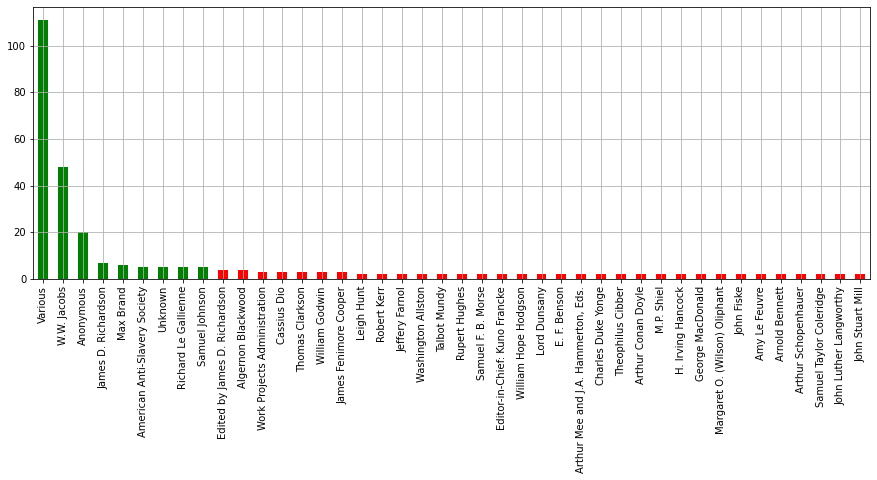

In [19]:
author_counts = df['Author'].value_counts()

# Sort the series in descending order by count
author_counts = author_counts.sort_values(ascending=False)

# Select the top 10 values
top_10 = author_counts.head(42)


# Create a new figure with a larger plot area
plt.figure(figsize=(15, 5))

# Plot the top 10 values as a bar chart
top_10.plot(kind='bar', grid='True', color = ['red' if v < 5 else 'green' for v in author_counts.head(43).tolist()])

# Display the plot
plt.show()

In [20]:
#print(author_counts.head(43))

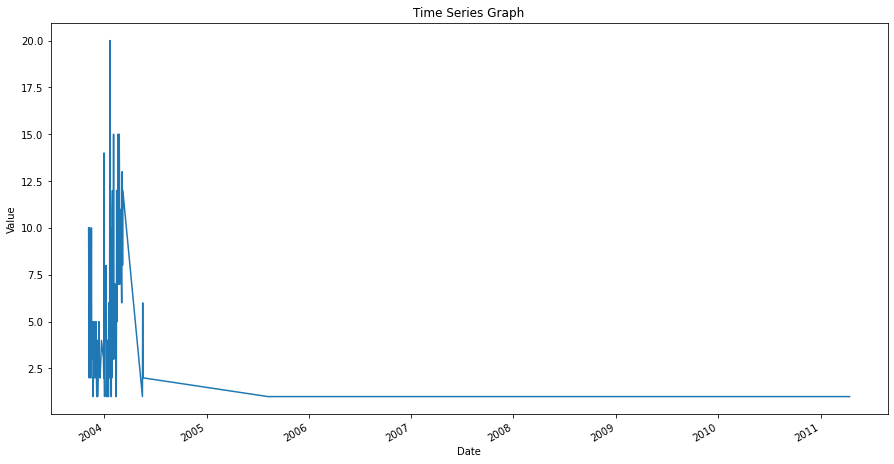

In [21]:
date_counts = df['Release Date'].value_counts()
plt.figure(figsize=(15,8))
date_counts.plot(x='index', y='values',title='Time Series Graph', 
       xlabel='Date', ylabel='Value')
plt.show()

From the graph, we can see that more books were released between 2003 and mid 2004 after which releases flat-lined.

#### Aditional Features

If this analysis is to be of any practical importance, it needs to solve a real world problem. For instance, as an educator you need to help your students bolster their vocabulary and that is done by reading books. Theoritically, the more the number of unique words in a book, the more diverse its vocabulary.
</br>
Based on this premise, we will engineer two new features- "Stemmed_Content" and "Unique Words". The later will be used to recommend books that will bolster the vocabulary of students.

#### Stemming
Stemming is the process of transforming to the root word. It uses an algorithm that removes common word-endings from English words, such as “ly,” “es,” “ed,” and “s.”

For example, assuming for an analysis you may want to consider “carefully,” “cared,” “cares,” “caringly” as “care” instead of separate words. There are three widely used stemming algorithms, namely:

Porter
Lancaster
Snowball
Out of these three, we will be using the SnowballStemmer.

In [25]:
from nltk import SnowballStemmer
stemmer = SnowballStemmer('english')
def df_stemmer(words, stemmer):
    return [stemmer.stem(word) for word in words]
df['Stemmed_Content'] = df['Content'].apply(df_stemmer, args=(stemmer, ))
df.head()

,Book_ID,Title,Author,Language,Release Date,Content,Length_of_book,Stemmed_Content
499,11275,"The Anti-Slavery Examiner, Omnibus",American Anti-Slavery Society,English,2004-02-25,"[the, antislavery, examiner, omnibus, produced...",894382,"[the, antislaveri, examin, omnibus, produc, by..."
497,11273,"The Anti-Slavery Examiner, Part 3 of 4",American Anti-Slavery Society,English,2004-02-25,"[antislavery, examiner, part, 3, of, 4, produc...",321735,"[antislaveri, examin, part, 3, of, 4, produc, ..."
496,11272,"The Anti-Slavery Examiner, Part 2 of 4",American Anti-Slavery Society,English,2004-02-25,"[antislavery, examiner, part, 2, of, 4, produc...",281174,"[antislaveri, examin, part, 2, of, 4, produc, ..."
400,11119,Personal Memoirs Of A Residence Of Thirty Year...,Henry Rowe Schoolcraft,English,2004-02-16,"[thirty, years, with, the, indian, tribes, pro...",251076,"[thirti, year, with, the, indian, tribe, produ..."
479,11248,The Delights of Wisdom Pertaining to Conjugial...,Emanuel Swedenborg,English,2004-02-23,"[the, delights, of, wisdom, produced, by, juli...",237266,"[the, delight, of, wisdom, produc, by, juliet,..."


Now that we have stemmed the texts in the "Content" column and generated a new feature - "Stemmed_Content", we will peoceed to remove the duplicates in the stem leaving us with just the unique words. Once we have done that, we can then do a count of the unique words and create a new feature - "Unique_Words".

In [26]:
# Remove duplicates using set()
def remove_dup(stemmed):
    return len(list(set(stemmed)))
df['Unique_Words'] = df['Stemmed_Content'].apply(remove_dup)
df.head()

,Book_ID,Title,Author,Language,Release Date,Content,Length_of_book,Stemmed_Content,Unique_Words
499,11275,"The Anti-Slavery Examiner, Omnibus",American Anti-Slavery Society,English,2004-02-25,"[the, antislavery, examiner, omnibus, produced...",894382,"[the, antislaveri, examin, omnibus, produc, by...",63800
497,11273,"The Anti-Slavery Examiner, Part 3 of 4",American Anti-Slavery Society,English,2004-02-25,"[antislavery, examiner, part, 3, of, 4, produc...",321735,"[antislaveri, examin, part, 3, of, 4, produc, ...",29653
496,11272,"The Anti-Slavery Examiner, Part 2 of 4",American Anti-Slavery Society,English,2004-02-25,"[antislavery, examiner, part, 2, of, 4, produc...",281174,"[antislaveri, examin, part, 2, of, 4, produc, ...",29575
400,11119,Personal Memoirs Of A Residence Of Thirty Year...,Henry Rowe Schoolcraft,English,2004-02-16,"[thirty, years, with, the, indian, tribes, pro...",251076,"[thirti, year, with, the, indian, tribe, produ...",30334
479,11248,The Delights of Wisdom Pertaining to Conjugial...,Emanuel Swedenborg,English,2004-02-23,"[the, delights, of, wisdom, produced, by, juli...",237266,"[the, delight, of, wisdom, produc, by, juliet,...",18917


### 5. Executive summary

Now let's put the maxim "quality over quantity" to test. Let's consider the first 10 novels with the highest number word count before stemming:

In [38]:
df.sort_values(by='Length_of_book', ascending=False, inplace=True)
df.loc[:,['Title','Author','Length_of_book','Unique_Words']].head(10)

,Title,Author,Length_of_book,Unique_Words
499,"The Anti-Slavery Examiner, Omnibus",American Anti-Slavery Society,894382,63800
497,"The Anti-Slavery Examiner, Part 3 of 4",American Anti-Slavery Society,321735,29653
496,"The Anti-Slavery Examiner, Part 2 of 4",American Anti-Slavery Society,281174,29575
400,Personal Memoirs Of A Residence Of Thirty Year...,Henry Rowe Schoolcraft,251076,30334
479,The Delights of Wisdom Pertaining to Conjugial...,Emanuel Swedenborg,237266,18917
495,"The Anti-Slavery Examiner, Part 1 of 4",American Anti-Slavery Society,225208,19414
392,History Of Modern Philosophy,Richard Falckenberg,218572,25783
196,"The History of the Rise, Progress and Accompli...",Thomas Clarkson,218245,21247
382,"The Orations of Marcus Tullius Cicero, Volume 4",Cicero,205768,18883
262,A General History and Collection of Voyages an...,Robert Kerr,205730,21395


Comparing the total number of words with the number of unique words, we can clearly see that the word count reduced drastically.

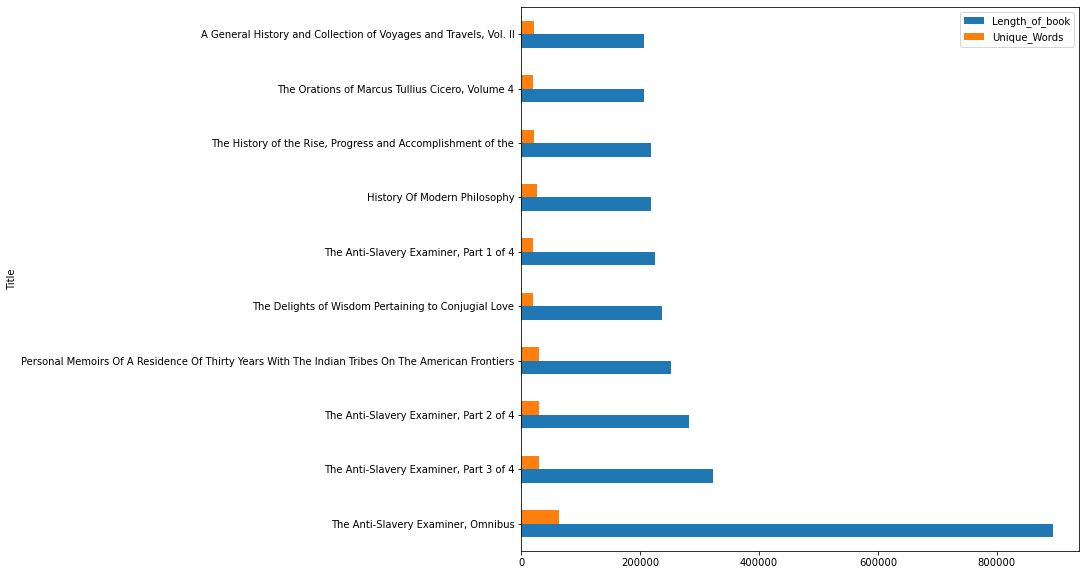

In [73]:
df.sort_values(by='Length_of_book', ascending=False, inplace=True)
df_cluster = df.loc[:,['Title','Length_of_book','Unique_Words']].head(10)

# Create a clustered bar chart
df_cluster.plot.barh(x='Title', y=['Length_of_book','Unique_Words'], stacked=False,figsize=(10, 10) )

# Add a title and axis labels
#plt.title('Clustered Bar Chart')
#plt.xlabel('Title')
#plt.ylabel('Word Count')

# Show the plot
plt.show()

Let us now check for the top 10 books; but this time, we'll not just check for the book with the highest word count but the ones with more unique words

In [58]:
df.sort_values(by='Unique_Words', ascending=False, inplace=True)
df.loc[:,['Title','Author','Length_of_book','Unique_Words']].head(10)

,Title,Author,Length_of_book,Unique_Words
499,"The Anti-Slavery Examiner, Omnibus",American Anti-Slavery Society,894382,63800
568,"Character Sketches of Romance, Fiction and the...","The Rev. E. Cobham Brewer, LL.D.",192606,33943
400,Personal Memoirs Of A Residence Of Thirty Year...,Henry Rowe Schoolcraft,251076,30334
497,"The Anti-Slavery Examiner, Part 3 of 4",American Anti-Slavery Society,321735,29653
496,"The Anti-Slavery Examiner, Part 2 of 4",American Anti-Slavery Society,281174,29575
240,The Former Philippines thru Foreign Eyes,Tomas de Comyn,201099,26062
392,History Of Modern Philosophy,Richard Falckenberg,218572,25783
130,"Life Of Johnson, Volume 5",Boswell,181639,24981
182,English Literature,William J. Long,193030,24385
219,The History of England from the First Invasion...,John Lingard and Hilaire Belloc,193425,24032


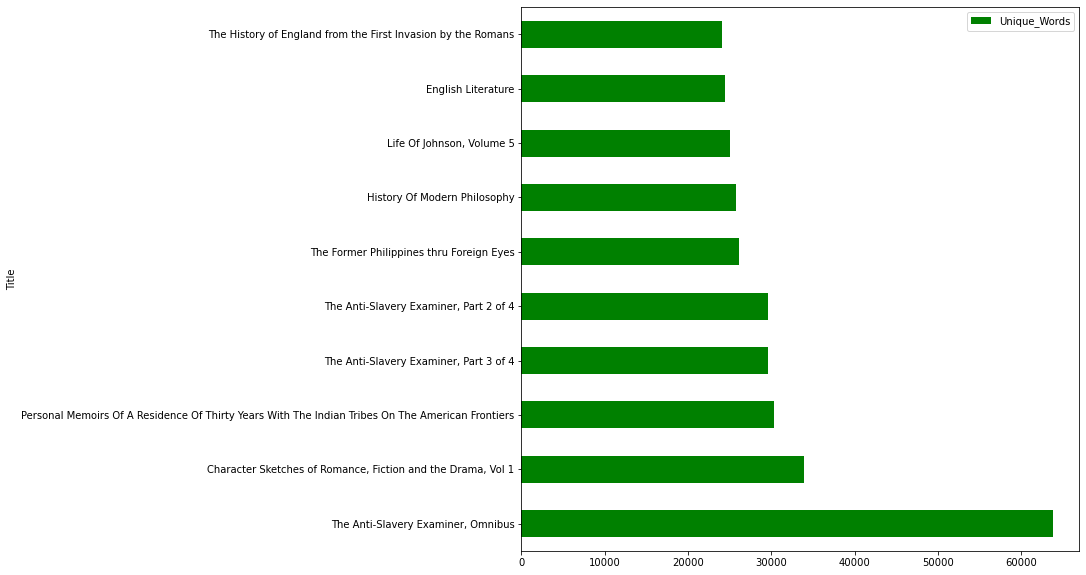

In [77]:
df.sort_values(by='Unique_Words', ascending=False, inplace=True)
df_cluster = df.loc[:,['Title','Length_of_book','Unique_Words']].head(10)

# Create a clustered bar chart
df_cluster.plot.barh(x='Title', y=['Unique_Words'], stacked=False,figsize=(10, 10), color = 'green' )

# Add a title and axis labels
#plt.title('Clustered Bar Chart')
#plt.xlabel('Title')
#plt.ylabel('Word Count')

# Show the plot
plt.show()

### Conclusion
The books that has more words doesn't neccesarily have a more diverse selection of lexicon. Hence, if i am to recommend 10 book to my students or peers with a sole intention of improving their vocabulary, based on this analysis. I will recommend the 10 books above that where found to have more unique words than the rest.


## Bibiography

Sources and Inspirational resources
* <a href="http://www.nltk.org/">NLTK</a>
* <a href="https://pythonprogramming.net/tokenizing-words-sentences-nltk-tutorial/">Tokenizing words and sentences with NLTK</a>
* <a href="https://www.analyticsvidhya.com/blog/2017/01/ultimate-guide-to-understand-implement-natural-language-processing-codes-in-python/">Ultimate Guide to Understand and Implement Natural Language Processing (with codes in Python)</a>
* <a href="http://www.nltk.org/book/ch06.html">Learning to Classify Text</a>
* <a href="https://www.statlearning.com/">An Introduction to Statistical Learning [Textbook]</a>
* <a href="https://www.datacamp.com/">Data Camp</a>
* <a href="https://matplotlib.org/">Matplotlib: Visualization with Python</a>